In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Function calculating jacoobian
def cal_jacobian(U, h):
    n = len(U) + 1
    # Initializng the values as per what we got in the first ans
    upper_diag = lower_diag = 1
    diagonal = -2 + 80 * h**2 * np.sin(U)
    jacobian = np.diag(diagonal) + np.diag(upper_diag * np.ones(n - 2), 1) + np.diag(lower_diag * np.ones(n - 2), -1)
    return jacobian / h**2

# Function calculating residual
def cal_residual(U, h):
    n = len(U) + 1
    residual = np.zeros_like(U)
    # Initializing residual values using the given components (F) in the question
    residual[0] = (U[1] - 2 * U[0]) / h**2 - 80 * np.cos(U[0])
    for i in range(1, n - 2):
        residual[i] = (U[i + 1] - 2 * U[i] + U[i - 1]) / h**2 - 80 * np.cos(U[i])
    residual[-1] = (10 - 2 * U[-1] + U[-2]) / h**2 - 80 * np.cos(U[-1])
    return residual

# Function to solve the system
def solve_nonlinear_system(U0, h):
    U = U0.copy()
    # Initializing some relative step size
    rel_step_size = 1
    # Keeping tolerance at 1e-10 for relative step size
    while(rel_step_size>=1e-10):
        jacobian, residual = cal_jacobian(U, h), cal_residual(U, h)
        delta_U = np.linalg.solve(jacobian, -residual)
        U += delta_U
        rel_step_size = np.linalg.norm(delta_U, 2) / np.linalg.norm(U, 2)
    return U

# Initializing given values
n = 100 
h = 1 / n
U0 = np.zeros(n - 1)

solution = solve_nonlinear_system(U0, h)

# Including boundary points
final_solution = np.concatenate(([0], solution, [10]))

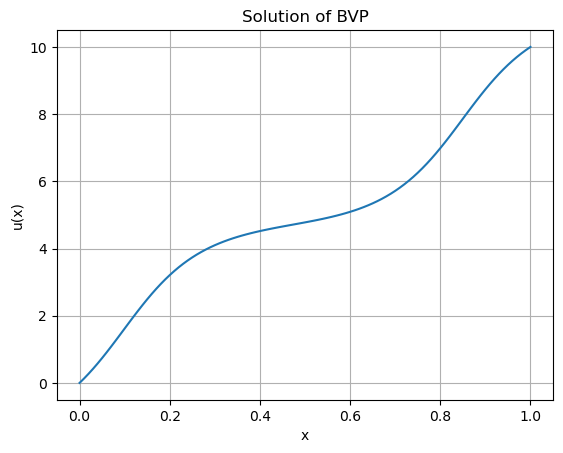

In [50]:
x = np.linspace(0, 1, n + 1)
plt.plot(x, final_solution)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution of BVP')
plt.grid(True)
plt.show()

In [51]:
U_50 = final_solution[50]
print(f'U_50 to three significant figures: {U_50:.3f}')


U_50 to three significant figures: 4.778
